In [99]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [100]:
data = load_boston()

In [101]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [102]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target

In [103]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


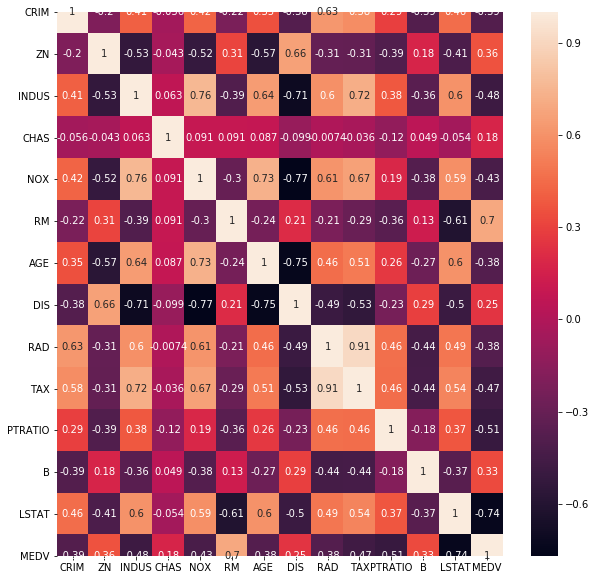

In [104]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),
            cbar=True,
            annot=True)

In [105]:
df = df.drop(['DIS'], axis=1)
df = df.drop(['CHAS'], axis=1)
df = df.drop(['ZN'], axis=1)
df = df.drop(['AGE'], axis=1)
df = df.drop(['B'], axis=1)
df

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,1.0,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,2.0,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,2.0,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,3.0,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,1.0,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,1.0,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,1.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,1.0,273.0,21.0,6.48,22.0


In [106]:
df.describe(include='all')

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,24.000000,711.000000,22.000000,37.970000,50.000000


In [107]:
df.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [108]:
df['RM'] = df['RM'].apply(math.ceil).astype(int)

In [109]:
df

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,7,1.0,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,7,2.0,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,8,2.0,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,7,3.0,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,8,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,7,1.0,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,7,1.0,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,7,1.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,7,1.0,273.0,21.0,6.48,22.0


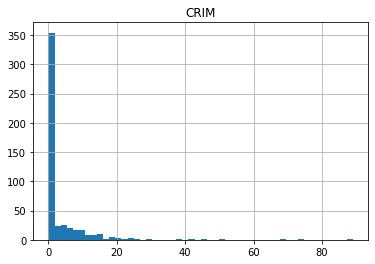

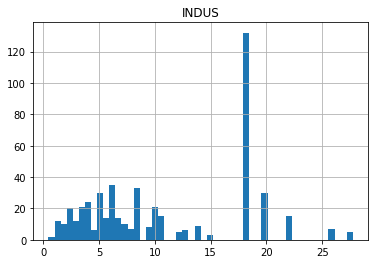

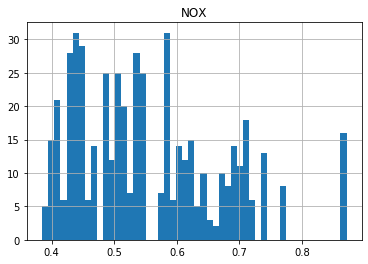

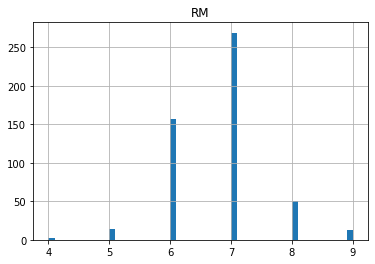

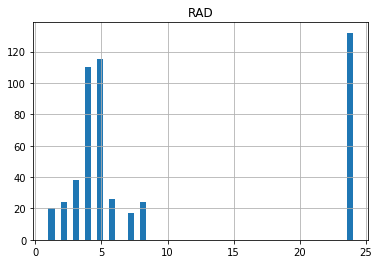

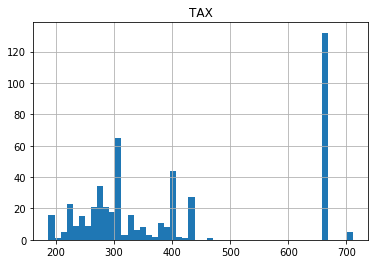

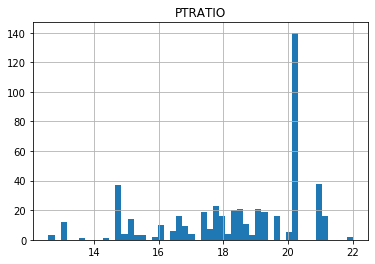

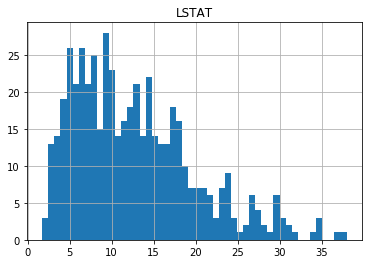

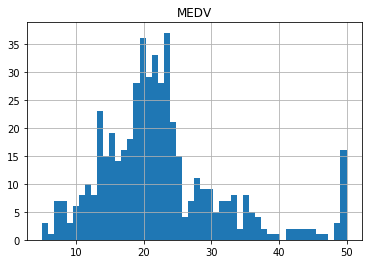

In [110]:
for i in df.columns:
    df[i].hist(bins = 50)
    plt.title(i)
    plt.show()

In [111]:
df[df['INDUS']>11].groupby('INDUS').count()

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
INDUS,,,,,,,,
11.93,5,5,5,5,5,5,5,5
12.83,6,6,6,6,6,6,6,6
13.89,4,4,4,4,4,4,4,4
13.92,5,5,5,5,5,5,5,5
15.04,3,3,3,3,3,3,3,3
18.10,132,132,132,132,132,132,132,132
19.58,30,30,30,30,30,30,30,30
21.89,15,15,15,15,15,15,15,15
25.65,7,7,7,7,7,7,7,7


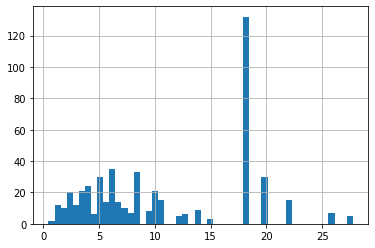

In [112]:
df['INDUS'].hist(bins = 50)

In [113]:
df[df['TAX'] == 666]

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
356,8.98296,18.1,0.770,7,24.0,666.0,20.2,17.60,17.8
357,3.84970,18.1,0.770,7,24.0,666.0,20.2,13.27,21.7
358,5.20177,18.1,0.770,7,24.0,666.0,20.2,11.48,22.7
359,4.26131,18.1,0.770,7,24.0,666.0,20.2,12.67,22.6
360,4.54192,18.1,0.770,7,24.0,666.0,20.2,7.79,25.0
...,...,...,...,...,...,...,...,...,...
483,2.81838,18.1,0.532,6,24.0,666.0,20.2,10.42,21.8
484,2.37857,18.1,0.583,6,24.0,666.0,20.2,13.34,20.6
485,3.67367,18.1,0.583,7,24.0,666.0,20.2,10.58,21.2
486,5.69175,18.1,0.583,7,24.0,666.0,20.2,14.98,19.1


In [114]:
df[df['TAX'] == 711]

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
488,0.15086,27.74,0.609,6,4.0,711.0,20.1,18.06,15.2
489,0.18337,27.74,0.609,6,4.0,711.0,20.1,23.97,7.0
490,0.20746,27.74,0.609,6,4.0,711.0,20.1,29.68,8.1
491,0.10574,27.74,0.609,6,4.0,711.0,20.1,18.07,13.6
492,0.11132,27.74,0.609,6,4.0,711.0,20.1,13.35,20.1


In [115]:
df[df["MEDV"] > 49]

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
161,1.46336,19.58,0.6050,8,5.0,403.0,14.7,1.73,50.0
162,1.83377,19.58,0.6050,8,5.0,403.0,14.7,1.92,50.0
163,1.51902,19.58,0.6050,9,5.0,403.0,14.7,3.32,50.0
166,2.01019,19.58,0.6050,8,5.0,403.0,14.7,3.70,50.0
186,0.05602,2.46,0.4880,8,3.0,193.0,17.8,4.45,50.0
195,0.01381,0.46,0.4220,8,4.0,255.0,14.4,2.97,50.0
204,0.02009,2.68,0.4161,9,4.0,224.0,14.7,2.88,50.0
225,0.52693,6.20,0.5040,9,8.0,307.0,17.4,4.63,50.0
257,0.61154,3.97,0.6470,9,5.0,264.0,13.0,5.12,50.0
267,0.57834,3.97,0.5750,9,5.0,264.0,13.0,7.44,50.0


In [116]:
df = df[df["INDUS"] <= 19]

In [117]:
df = df[df["MEDV"] <= 49]

In [118]:
df = df[df['TAX'] < 666]

In [119]:
df

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,7,1.0,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,7,2.0,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,8,2.0,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,7,3.0,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,8,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,7,1.0,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,7,1.0,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,7,1.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,7,1.0,273.0,21.0,6.48,22.0


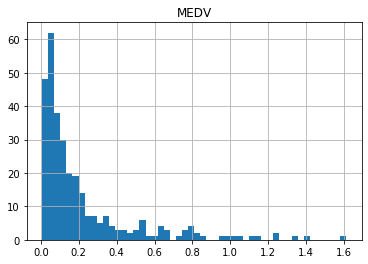

In [120]:
df[df['CRIM'] < 2]['CRIM'].hist(bins = 50)
plt.title(i)
plt.show()

<Figure size 720x720 with 0 Axes>

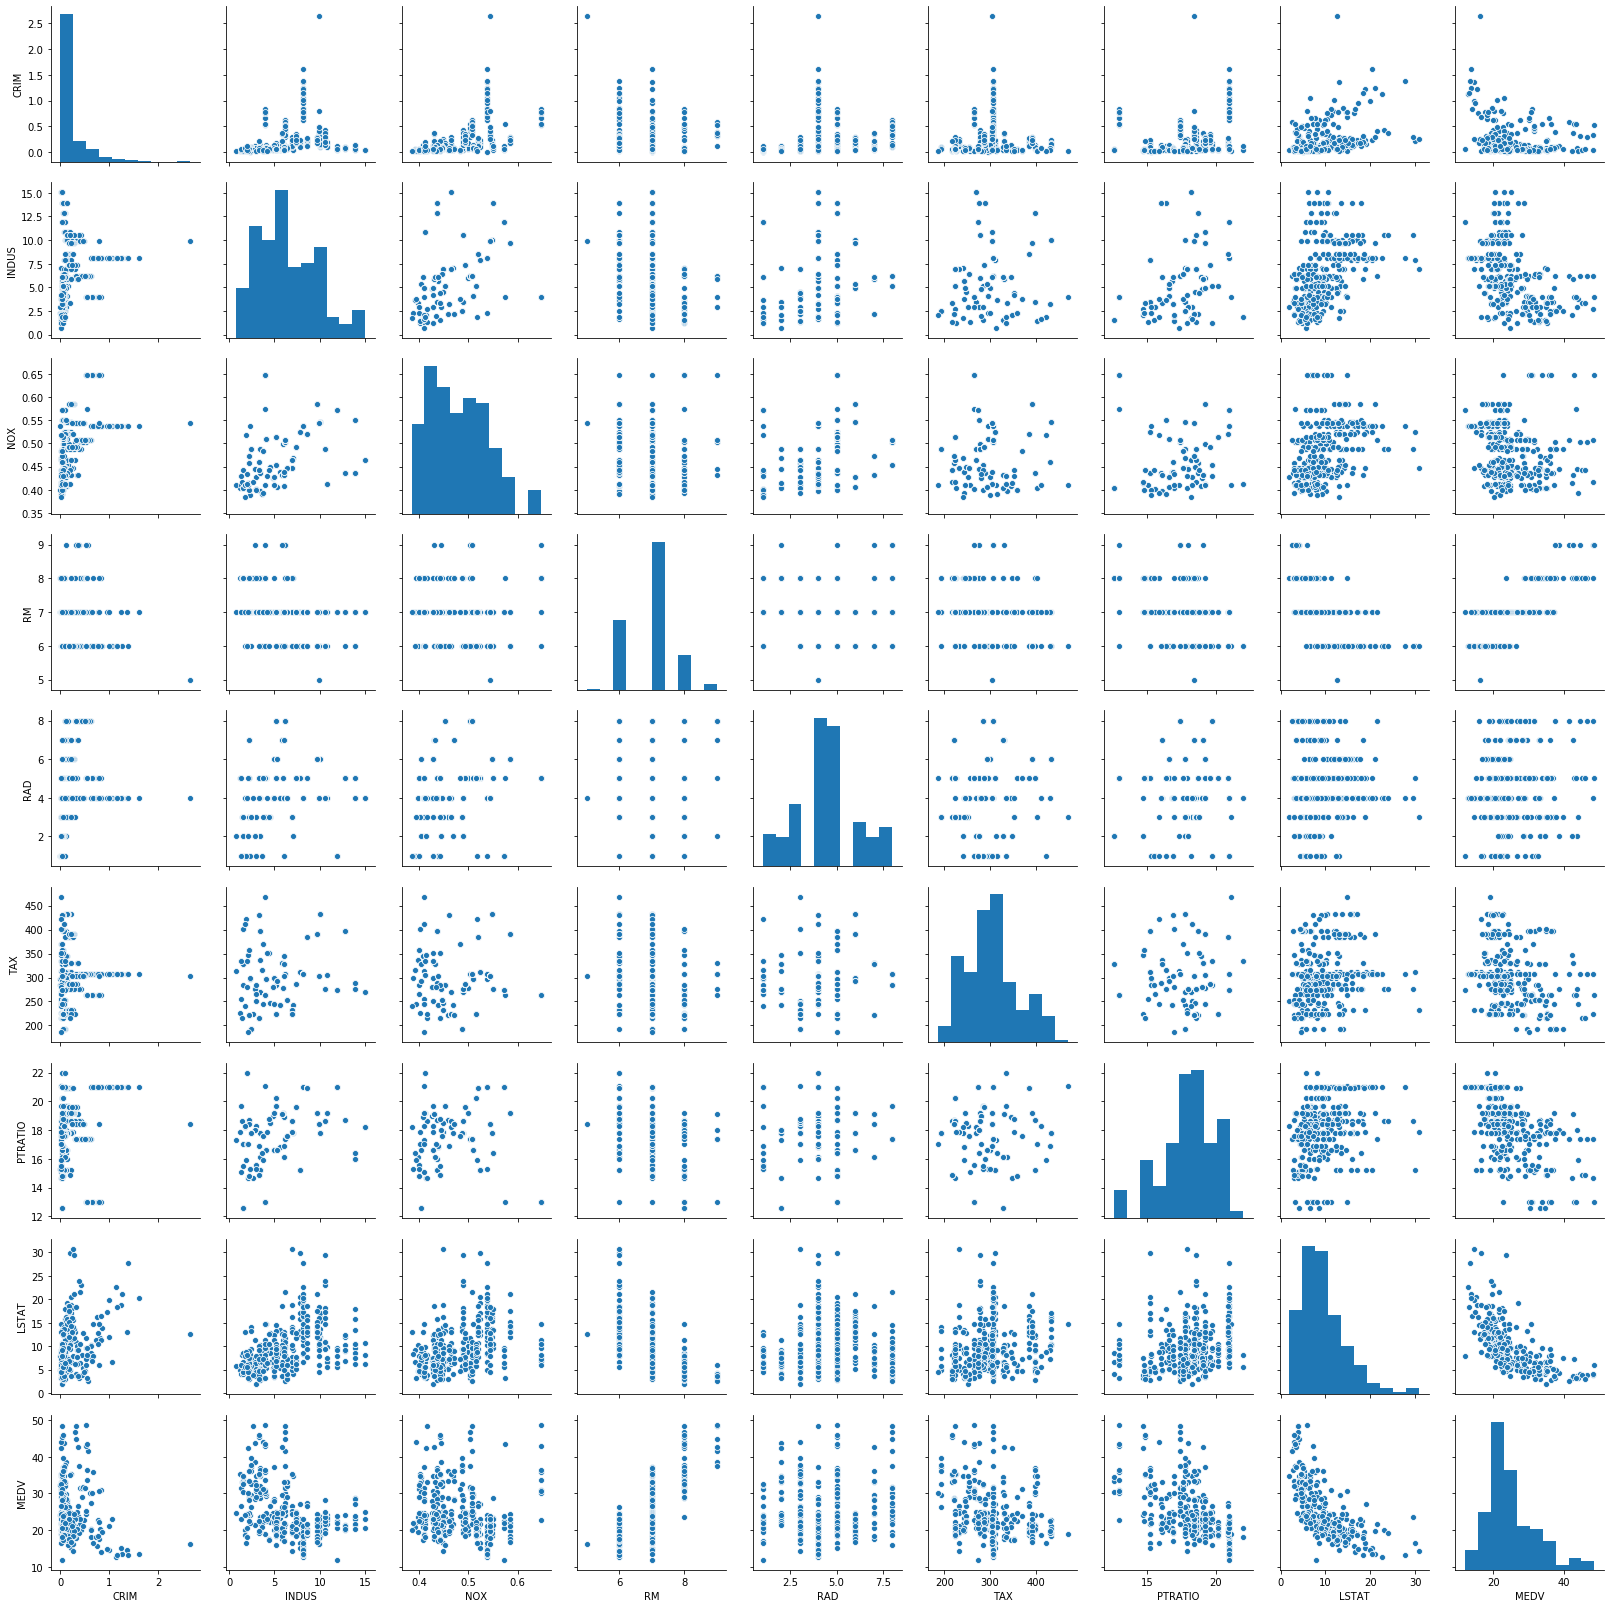

In [121]:
plt.figure(figsize=(10, 10))
sns.pairplot(df)

In [122]:
df['LSTAT'] = (1/df['LSTAT']).apply(math.sqrt)
# такое преобразование визуально кажется необходимым

<Figure size 720x720 with 0 Axes>

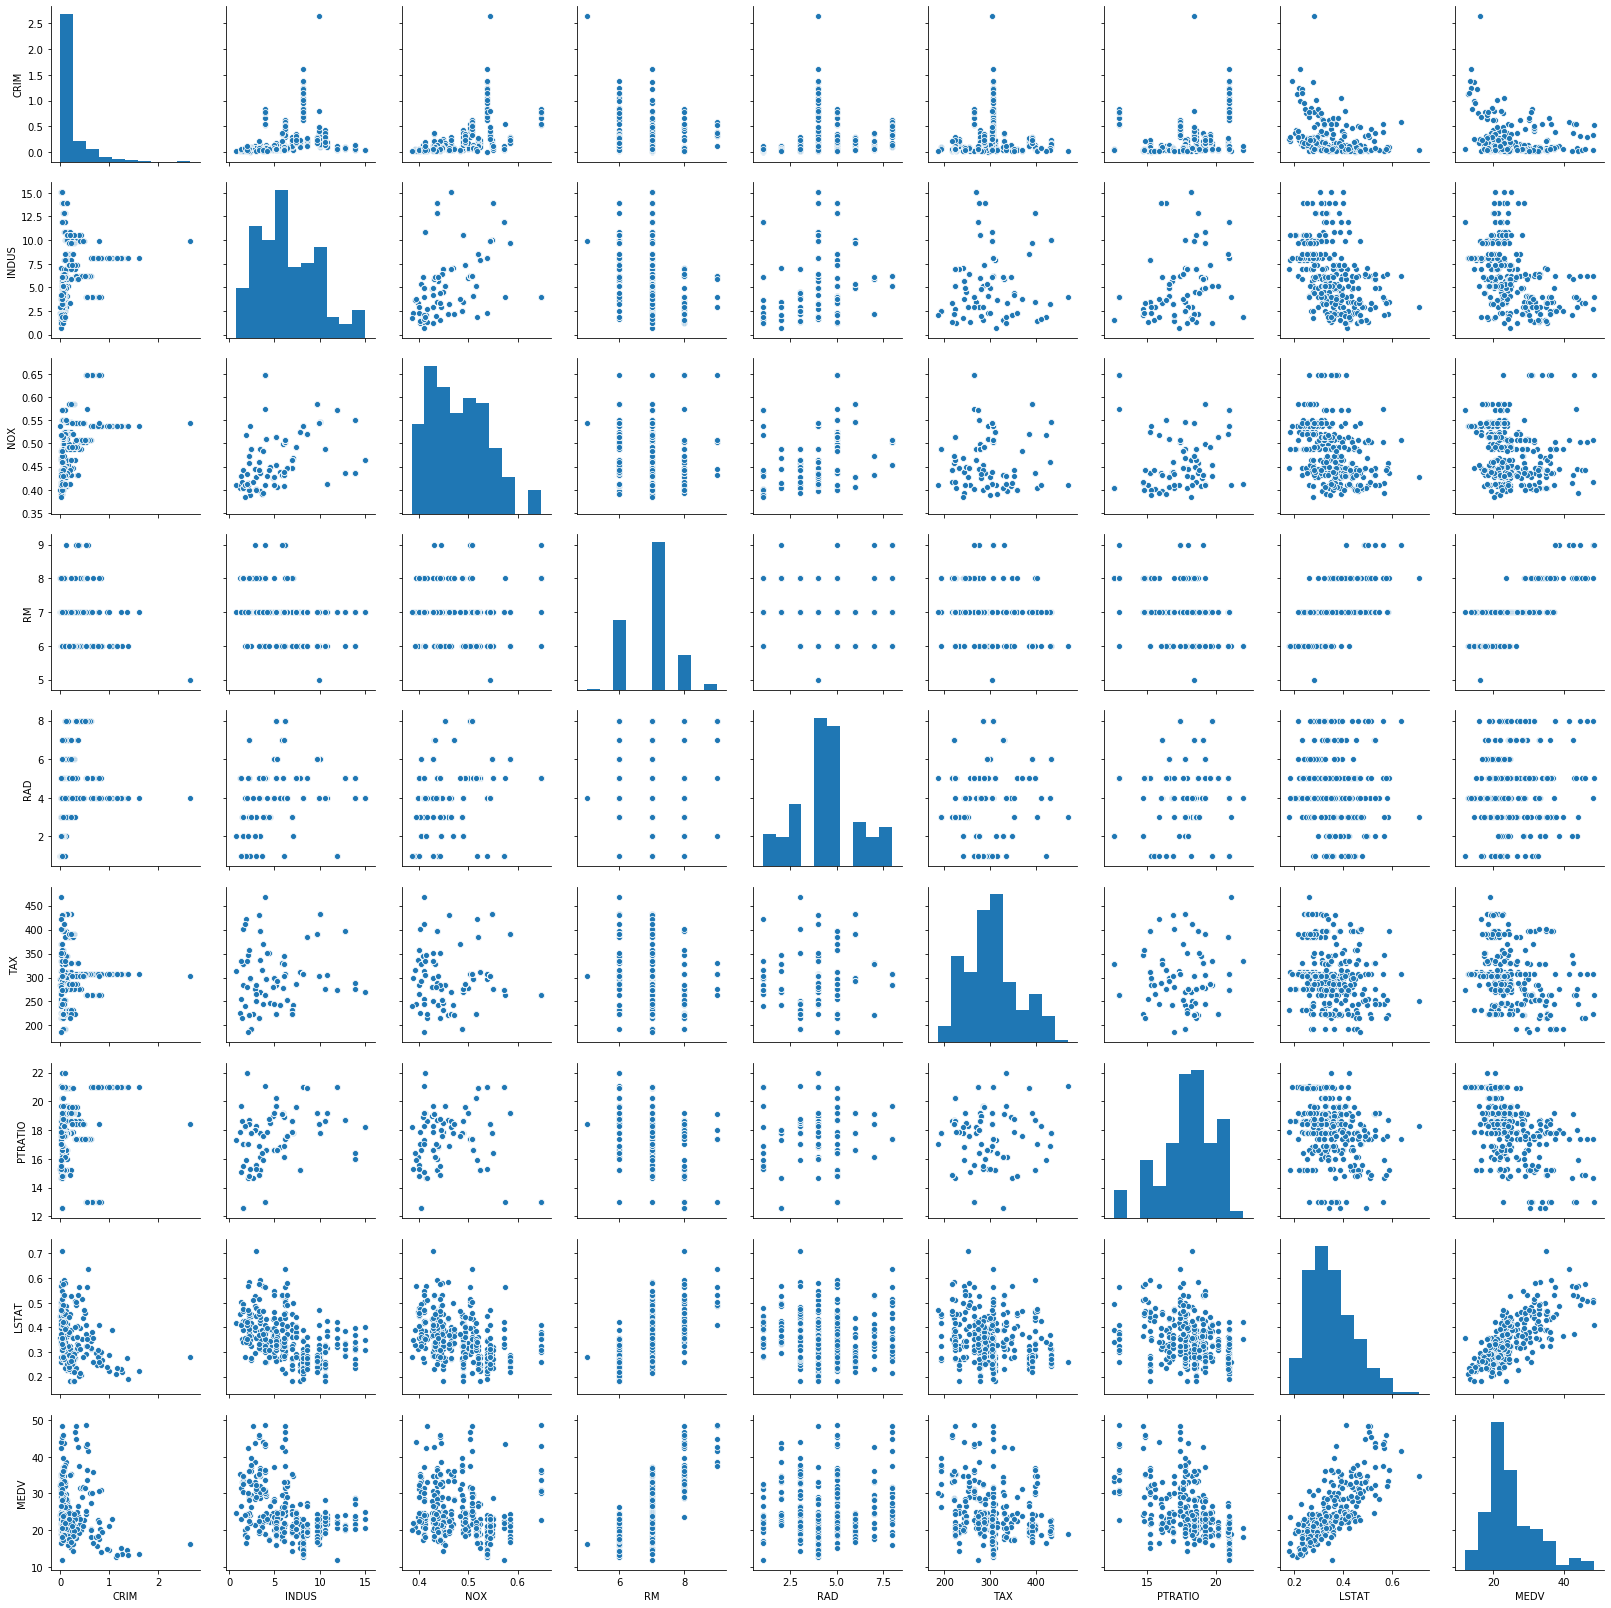

In [123]:
plt.figure(figsize=(10, 10))
sns.pairplot(df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

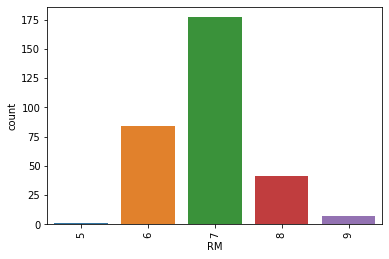

In [124]:
sns.countplot(x='RM', data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

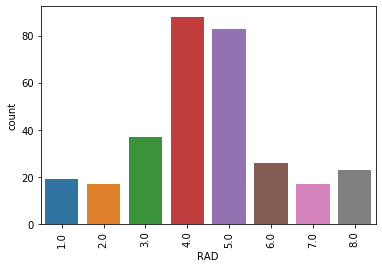

In [125]:
sns.countplot(x='RAD', data=df)
plt.xticks(rotation=90)

In [126]:
from sklearn.model_selection import train_test_split
y = df['MEDV']
X = df[df.columns.difference(['MEDV'])] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.7333345301073706

In [128]:
y_pred = lr.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

3.5844996733222922

In [129]:
y_test.mean()

24.177419354838708

In [130]:
y_train.mean()

25.216129032258074

такую же точность дают всего 2 признака 'LSTAT', 'RM' что логично и объясняется следующим:
%статусного населения практически всегда задает район, а кол-во комнат размер квартиры

In [131]:
df_1 = df[['LSTAT','MEDV', 'RM']]

In [132]:
from sklearn.model_selection import train_test_split
y = df_1['MEDV']
X = df_1[df_1.columns.difference(['MEDV'])] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [133]:
model = LinearRegression().fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.6504712132028967

In [134]:
y_pred = model.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

4.103804168900683

In [135]:
y_test.mean()

24.177419354838708

In [136]:
y_train.mean()

25.216129032258074